In [2]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from utils import summarize_variable, transform_to_df, cut_int_hours

In [3]:
df = pd.read_csv("../data/delays_imputed_train.csv")
df_oos = pd.read_csv("../data/delays_imputed_test.csv", index_col=0)

In [4]:
df.head()

,Weekday,Month_of_Year,Day_of_Month,Scheduled_Departure_Time,Scheduled_Arrival_Time,Marketing_Airline,Departure_State,Arrival_State,Departure_Delay,Arrival_Delay,...,Flight_Diverted,Actual_Departure_Time,Flight_Duration,Flight_Distance,Origin_Temperature,Destination_Temperature,Origin_Wind_Speed,Destination_Wind_Speed,Origin_Precipitation,Destination_Precipitation
0,2,6,21,1216,1304,AA,AZ,AZ,0.088687,-4.178483,...,False,1216.0,23.0,110.0,13.279939,20.470690,18.045064,12.910265,0.0,0.0
1,3,1,5,1945,2055,DL,MN,WI,-1.450772,5.042185,...,False,1945.0,36.0,119.0,17.816202,13.967273,21.606228,17.976362,0.0,0.1
2,2,3,22,700,924,AA,FL,TX,-1.802698,-0.206932,...,False,658.0,125.0,641.0,24.562566,14.509228,24.946489,22.630553,0.0,0.0
3,4,7,14,2130,2359,AS,WA,NV,-1.683656,14.006092,...,False,2133.0,130.0,867.0,8.817992,10.866812,17.426336,17.401007,0.0,0.0
4,1,5,30,750,915,WN,CA,CA,-2.181755,-14.067374,...,False,748.0,58.0,417.0,9.360464,15.977111,19.001179,16.884960,0.0,0.0


In [5]:
df_oos.isna().sum()

Weekday                      0
Month_of_Year                0
Day_of_Month                 0
Scheduled_Departure_Time     0
Scheduled_Arrival_Time       0
Marketing_Airline            0
Departure_State              0
Arrival_State                0
Departure_Delay              0
Diverted_Airport_Landings    0
Taxi_Out_Time                0
Taxi_In_Time                 0
Flight_Diverted              0
Actual_Departure_Time        0
Flight_Duration              0
Flight_Distance              0
Origin_Temperature           0
Destination_Temperature      0
Origin_Wind_Speed            0
Destination_Wind_Speed       0
Origin_Precipitation         0
Destination_Precipitation    0
dtype: int64

## Inspecting target variable

### Arrival_Delay



0 missing values
1420021 unique values


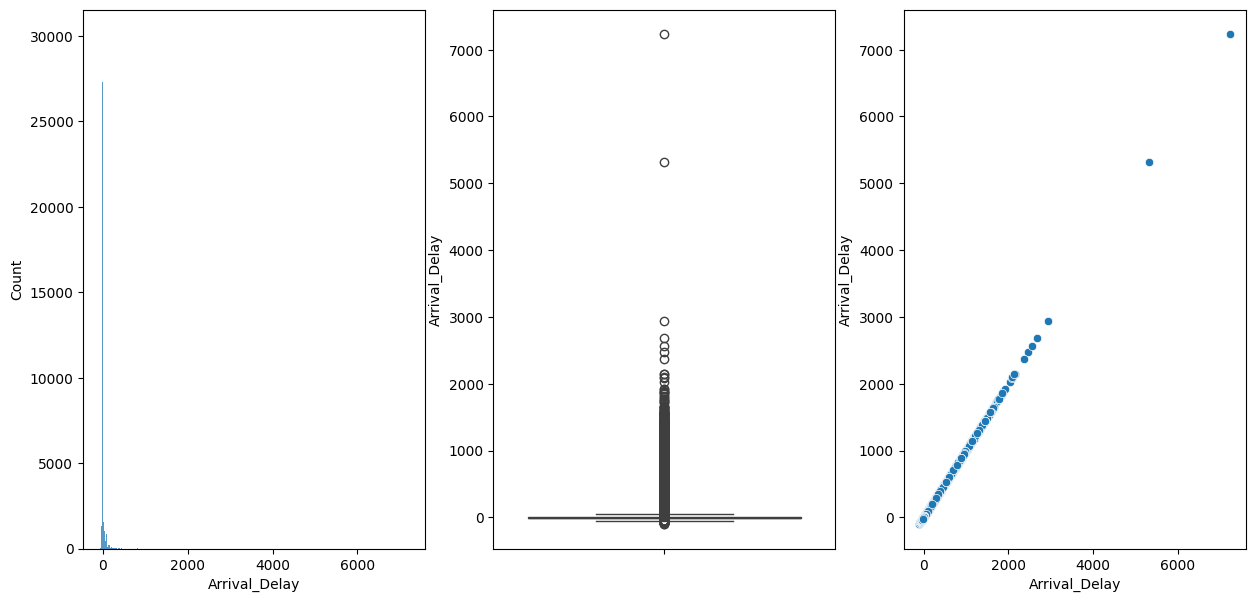

In [6]:
summarize_variable(df["Arrival_Delay"], df)

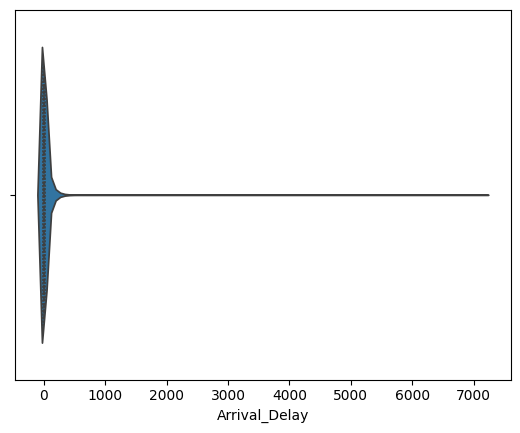

In [7]:
sns.violinplot(x=df["Arrival_Delay"], inner="quartile");

## Inspection of features and feature engineering

### Weekday



0 missing values
7 unique values

[2, 3, 4, 1, 5, 6, 7]


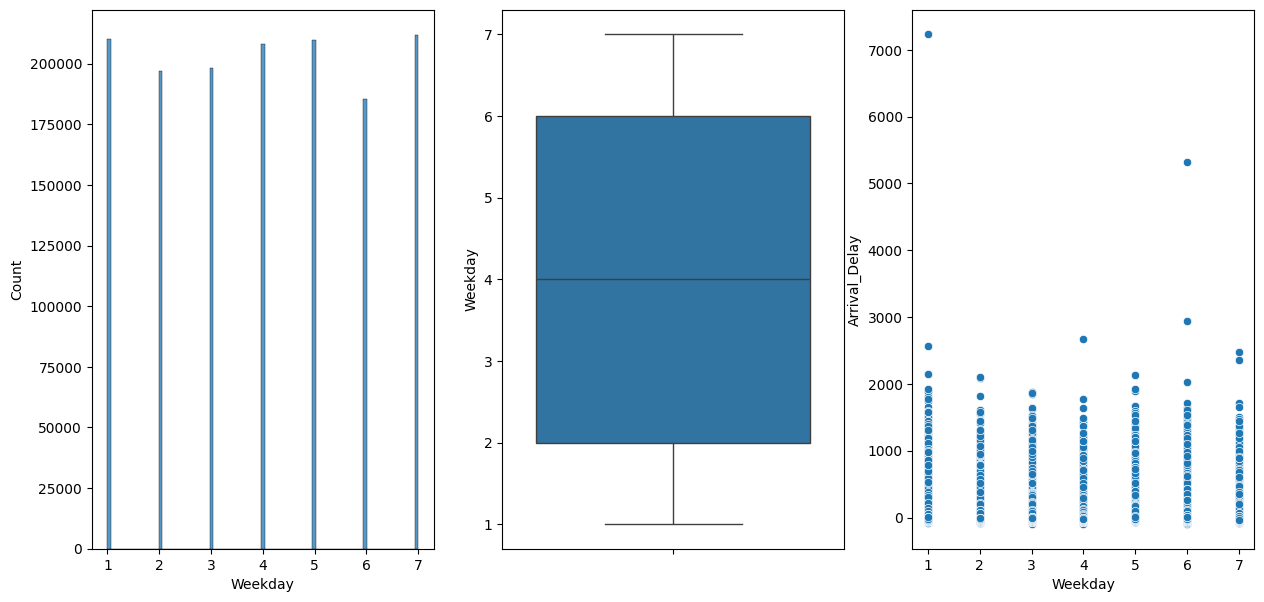

In [8]:
summarize_variable(df["Weekday"], df)

In [9]:
weekdays = {1:"sun", 2:"mon", 3:"tue", 4:"wed", 5:"thu", 6:"fri", 7:"sat"}

df["Weekday"] = df["Weekday"].map(weekdays)
df_oos["Weekday"] = df_oos["Weekday"].map(weekdays)

In [10]:
df_oos.isna().sum()

Weekday                      0
Month_of_Year                0
Day_of_Month                 0
Scheduled_Departure_Time     0
Scheduled_Arrival_Time       0
Marketing_Airline            0
Departure_State              0
Arrival_State                0
Departure_Delay              0
Diverted_Airport_Landings    0
Taxi_Out_Time                0
Taxi_In_Time                 0
Flight_Diverted              0
Actual_Departure_Time        0
Flight_Duration              0
Flight_Distance              0
Origin_Temperature           0
Destination_Temperature      0
Origin_Wind_Speed            0
Destination_Wind_Speed       0
Origin_Precipitation         0
Destination_Precipitation    0
dtype: int64

In [11]:
weekday_encoder = OneHotEncoder(drop="first")
weekday_encoder.fit(df["Weekday"].to_numpy().reshape(-1,1))

OneHotEncoder(drop='first')

In [12]:
df = pd.concat([df, transform_to_df(df["Weekday"], weekday_encoder, "weekday")], axis=1).drop("Weekday", axis=1)
df_oos = pd.concat([df_oos, transform_to_df(df_oos["Weekday"], weekday_encoder, "weekday")], axis=1).drop("Weekday", axis=1)

### Month_of_Year



0 missing values
7 unique values

[6, 1, 3, 7, 5, 2, 4]


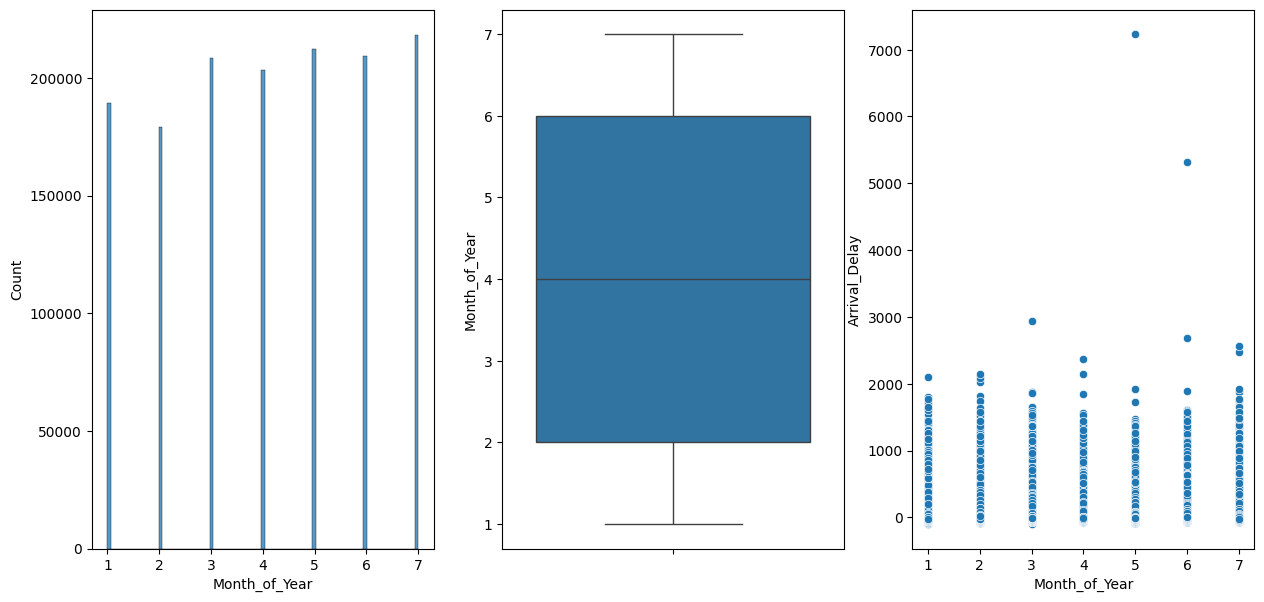

In [13]:
summarize_variable(df["Month_of_Year"], df)

In [14]:
month_encoder = OneHotEncoder(drop="first")
month_encoder.fit(df["Month_of_Year"].to_numpy().reshape(-1,1))

OneHotEncoder(drop='first')

In [15]:
df = pd.concat([df, transform_to_df(df["Month_of_Year"], month_encoder, "month")], axis=1).drop("Month_of_Year", axis=1)
df_oos = pd.concat([df_oos, transform_to_df(df_oos["Month_of_Year"], month_encoder, "month")], axis=1).drop("Month_of_Year", axis=1)

### Day_of_Month



0 missing values
31 unique values

[21, 5, 22, 14, 30, 4, 1, 15, 25, 23, 10, 28, 9, 2, 29, 8, 3, 31, 16, 20, 12, 17, 19, 7, 18, 6, 26, 13, 27, 24, 11]


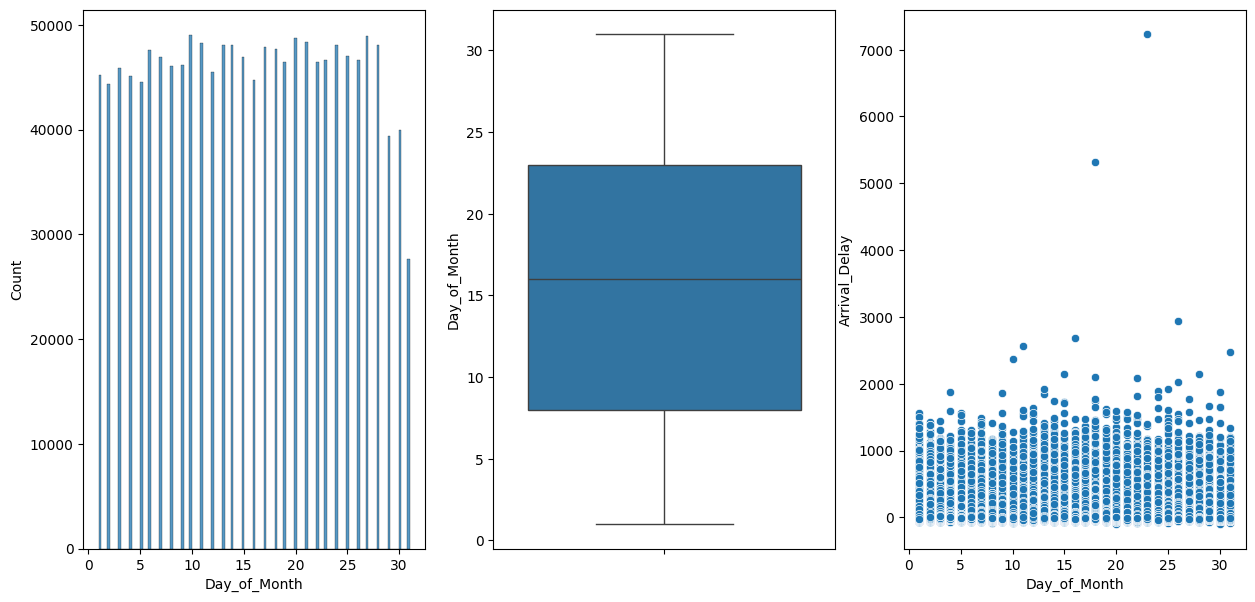

In [16]:
summarize_variable(df["Day_of_Month"], df)

We can discard this variable as we believe it will not be important for the analysis

In [17]:
df.drop(["Day_of_Month"], axis=1, inplace=True)

In [18]:
df_oos.drop(["Day_of_Month"], axis=1, inplace=True)

### Scheduled_Departure_Time



0 missing values
1303 unique values


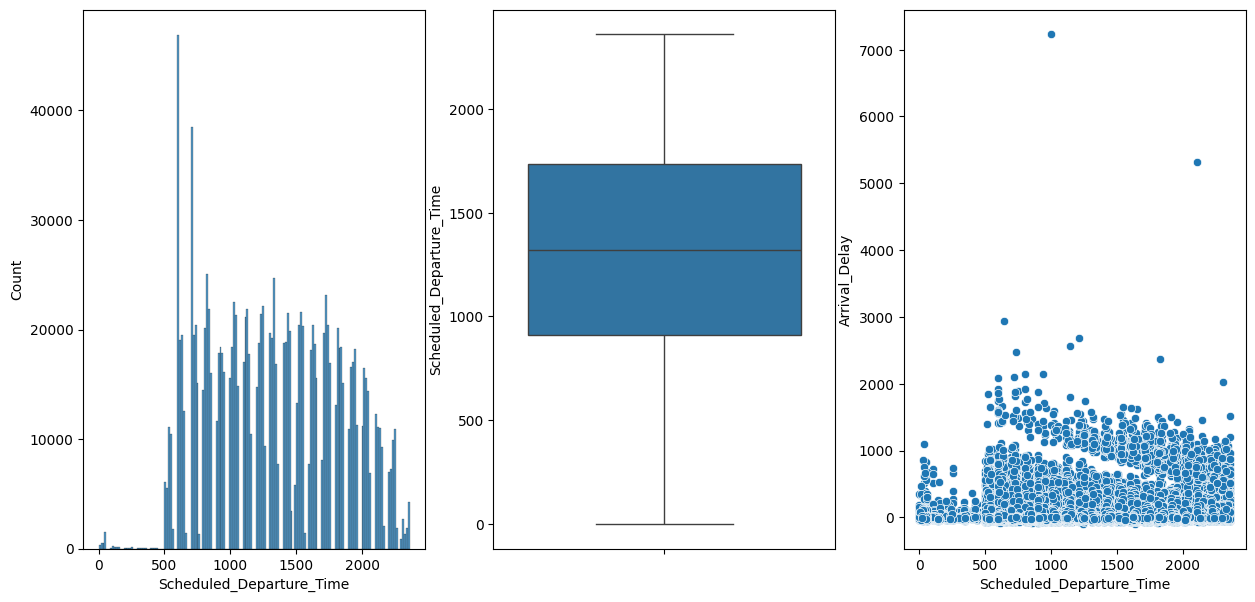

In [19]:
summarize_variable(df["Scheduled_Departure_Time"], df)

In [20]:
df["Scheduled_Departure_Time"] = cut_int_hours(df["Scheduled_Departure_Time"])
df_oos["Scheduled_Departure_Time"] = cut_int_hours(df_oos["Scheduled_Departure_Time"])

In [21]:
schedule_encoder = OneHotEncoder(drop="first")
schedule_encoder.fit(df["Scheduled_Departure_Time"].to_numpy().reshape(-1,1))

OneHotEncoder(drop='first')

In [22]:
df = pd.concat([df, transform_to_df(df["Scheduled_Departure_Time"], schedule_encoder, "scheduled_departure")], axis=1).drop("Scheduled_Departure_Time", axis=1)
df_oos = pd.concat([df_oos, transform_to_df(df_oos["Scheduled_Departure_Time"], schedule_encoder, "scheduled_departure")], axis=1).drop("Scheduled_Departure_Time", axis=1)

### Scheduled_Arrival_Time



0 missing values
1377 unique values


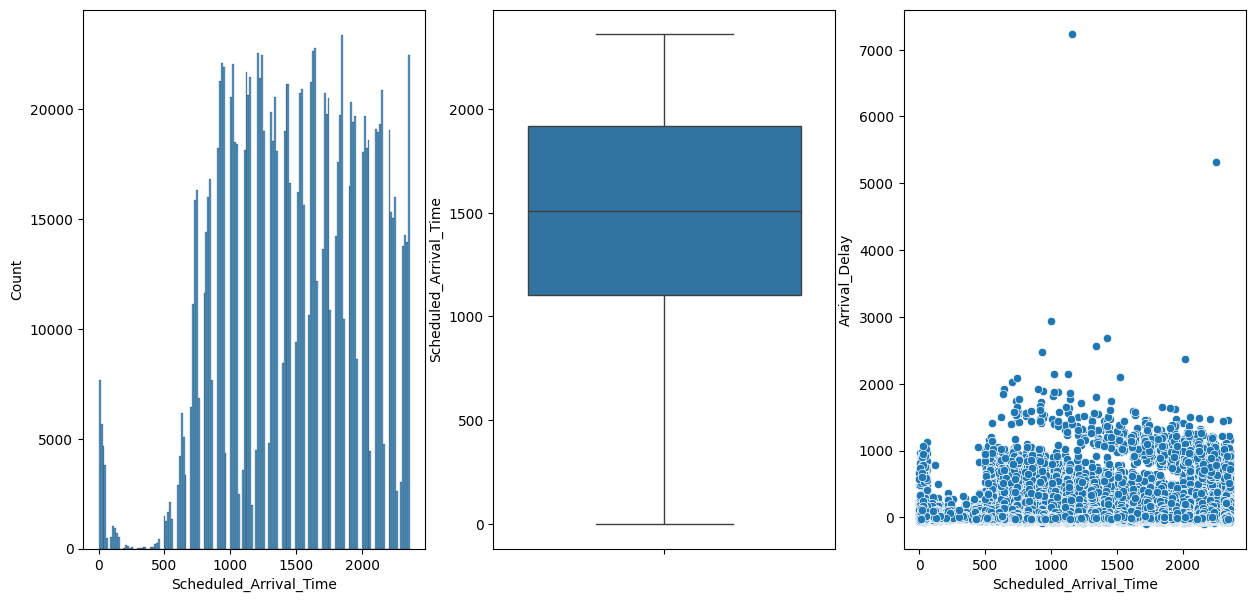

In [23]:
summarize_variable(df["Scheduled_Arrival_Time"], df)

In [24]:
df["Scheduled_Arrival_Time"] = cut_int_hours(df["Scheduled_Arrival_Time"])
df_oos["Scheduled_Arrival_Time"] = cut_int_hours(df_oos["Scheduled_Arrival_Time"])

In [25]:
schedule_encoder = OneHotEncoder(drop="first")
schedule_encoder.fit(df["Scheduled_Arrival_Time"].to_numpy().reshape(-1,1))

OneHotEncoder(drop='first')

In [26]:
df = pd.concat([df, transform_to_df(df["Scheduled_Arrival_Time"], schedule_encoder, "scheduled_arrival")], axis=1).drop("Scheduled_Arrival_Time", axis=1)
df_oos = pd.concat([df_oos, transform_to_df(df_oos["Scheduled_Arrival_Time"], schedule_encoder, "scheduled_arrival")], axis=1).drop("Scheduled_Arrival_Time", axis=1)

### Marketing_Airline



0 missing values
10 unique values

['AA', 'DL', 'AS', 'WN', 'UA', 'B6', 'G4', 'NK', 'F9', 'HA']


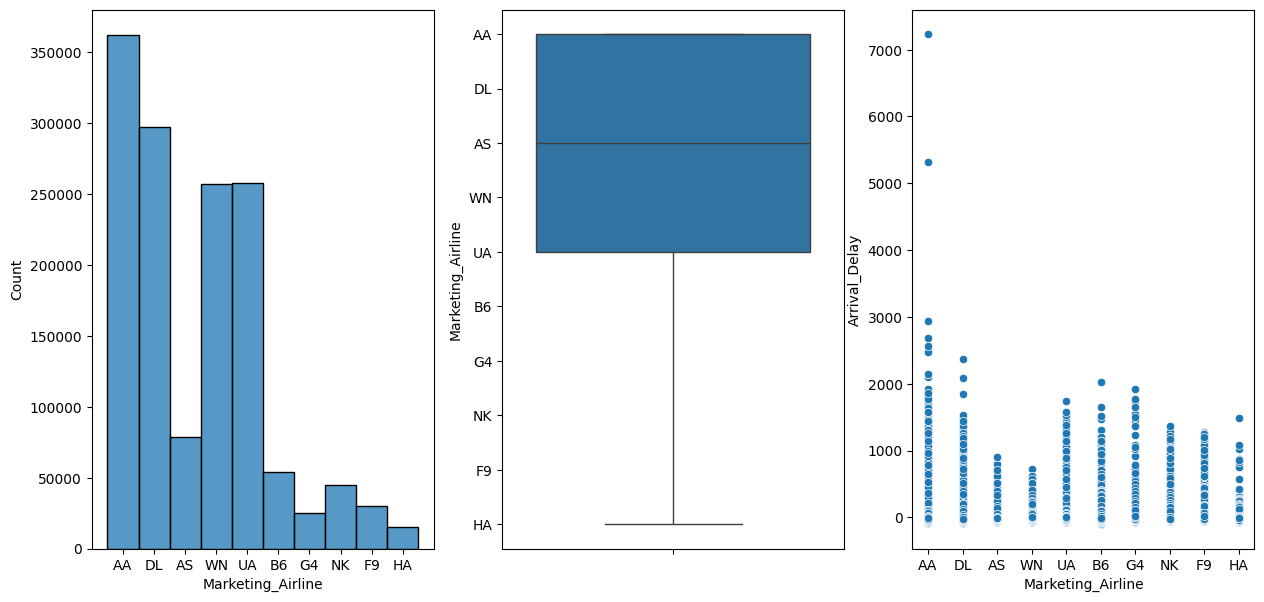

In [27]:
summarize_variable(df["Marketing_Airline"], df)

In [28]:
airline_encoder = OneHotEncoder(drop="first")
airline_encoder.fit(df["Marketing_Airline"].to_numpy().reshape(-1,1))

OneHotEncoder(drop='first')

In [29]:
df = pd.concat([df, transform_to_df(df["Marketing_Airline"], airline_encoder, "airline")], axis=1).drop("Marketing_Airline", axis=1)
df_oos = pd.concat([df_oos, transform_to_df(df_oos["Marketing_Airline"], airline_encoder, "airline")], axis=1).drop("Marketing_Airline", axis=1)

### Departure_State



0 missing values
53 unique values


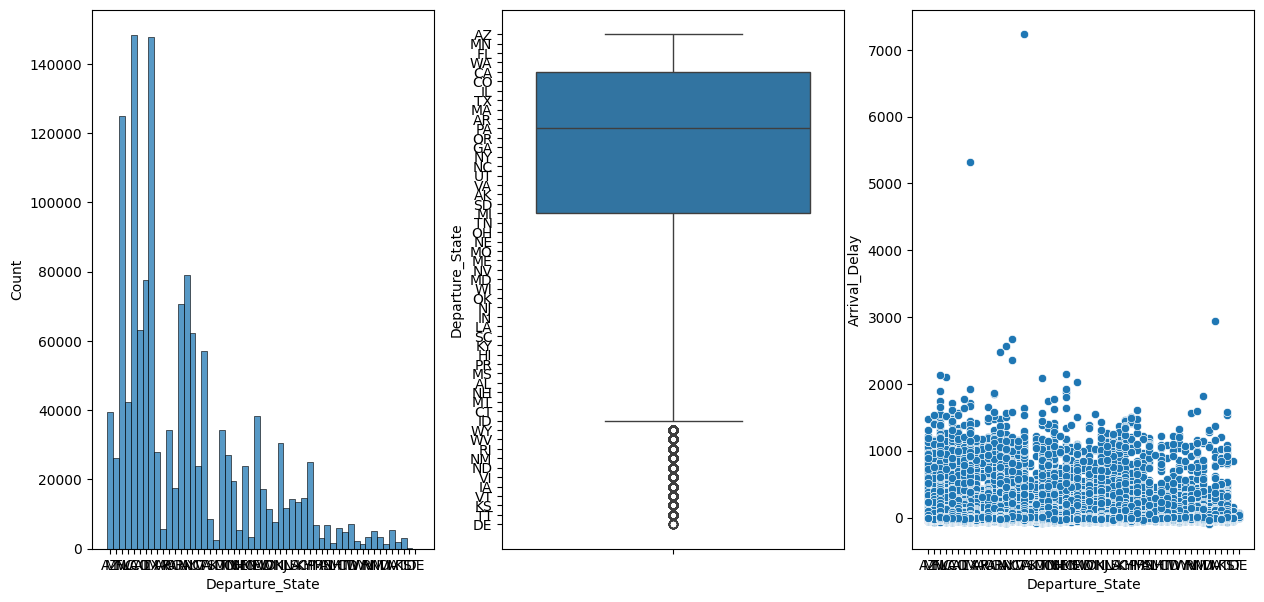

In [30]:
summarize_variable(df["Departure_State"], df)

In [31]:
state_encoder = OneHotEncoder(drop="first")
state_encoder.fit(df["Departure_State"].to_numpy().reshape(-1,1))

OneHotEncoder(drop='first')

In [32]:
df = pd.concat([df, transform_to_df(df["Departure_State"], state_encoder, "departure_state")], axis=1).drop("Departure_State", axis=1)
df_oos = pd.concat([df_oos, transform_to_df(df_oos["Departure_State"], state_encoder, "departure_state")], axis=1).drop("Departure_State", axis=1)

### Arrival_State



0 missing values
53 unique values


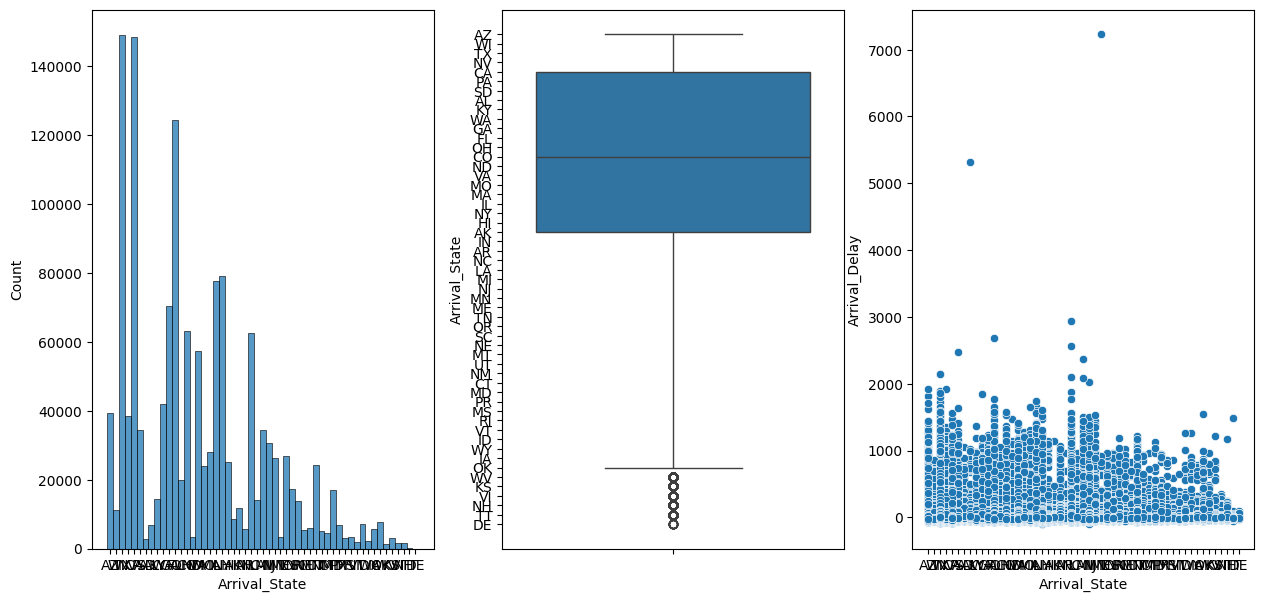

In [33]:
summarize_variable(df["Arrival_State"], df)

In [34]:
state_encoder = OneHotEncoder(drop="first")
state_encoder.fit(df["Arrival_State"].to_numpy().reshape(-1,1))

OneHotEncoder(drop='first')

In [35]:
df = pd.concat([df, transform_to_df(df["Arrival_State"], state_encoder, "arrival_state")], axis=1).drop("Arrival_State", axis=1)
df_oos = pd.concat([df_oos, transform_to_df(df_oos["Arrival_State"], state_encoder, "arrival_state")], axis=1).drop("Arrival_State", axis=1)

### Departure_Delay



0 missing values
1278469 unique values


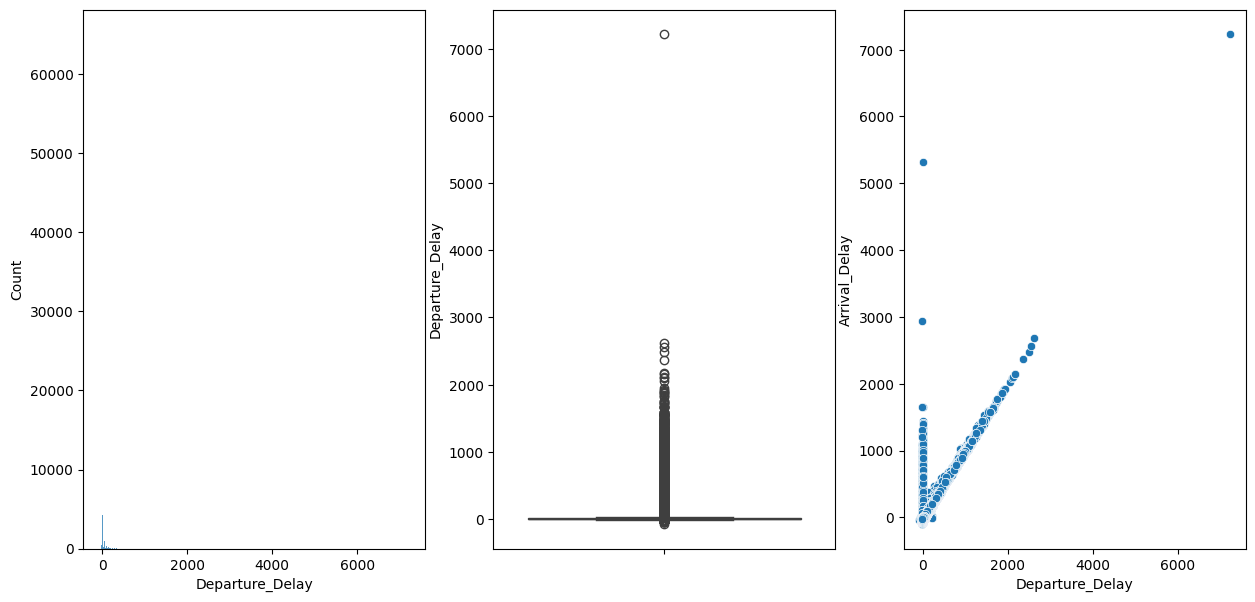

In [36]:
summarize_variable(df["Departure_Delay"], df)

### Diverted_Airport_Landings



0 missing values
1 unique values

[0]


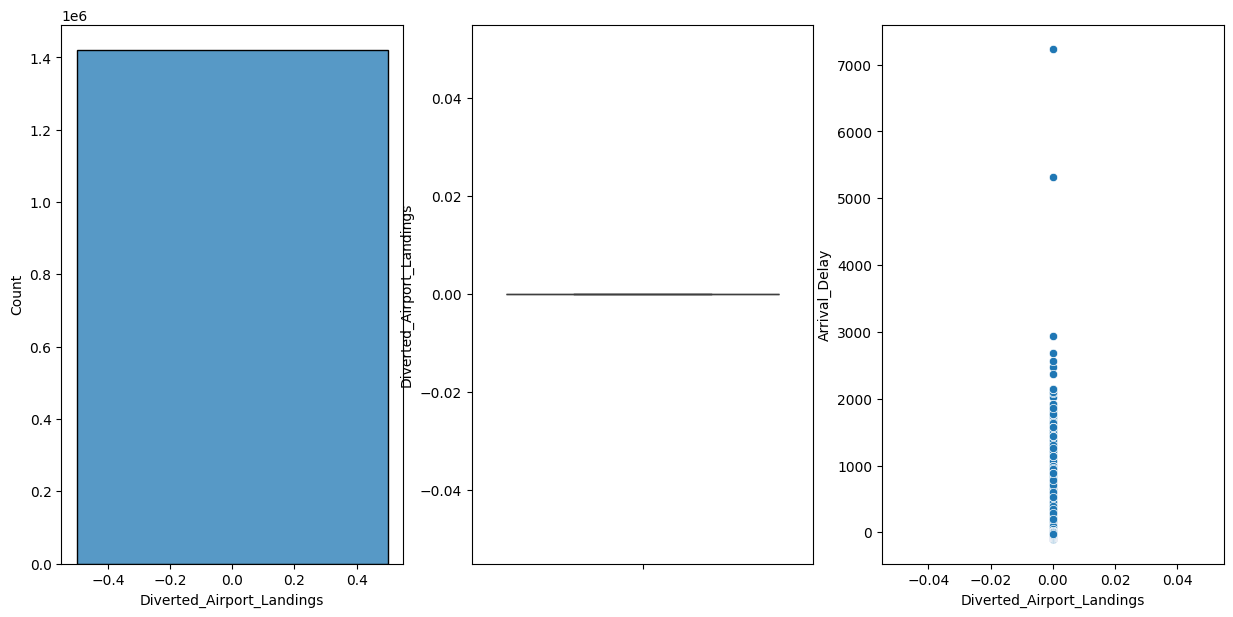

In [37]:
summarize_variable(df["Diverted_Airport_Landings"], df)

Due to only having one value we will discard this column

In [38]:
df.drop(["Diverted_Airport_Landings"], axis=1, inplace=True)
df_oos.drop(["Diverted_Airport_Landings"], axis=1, inplace=True)

### Flight_Diverted



0 missing values
1 unique values

[False]


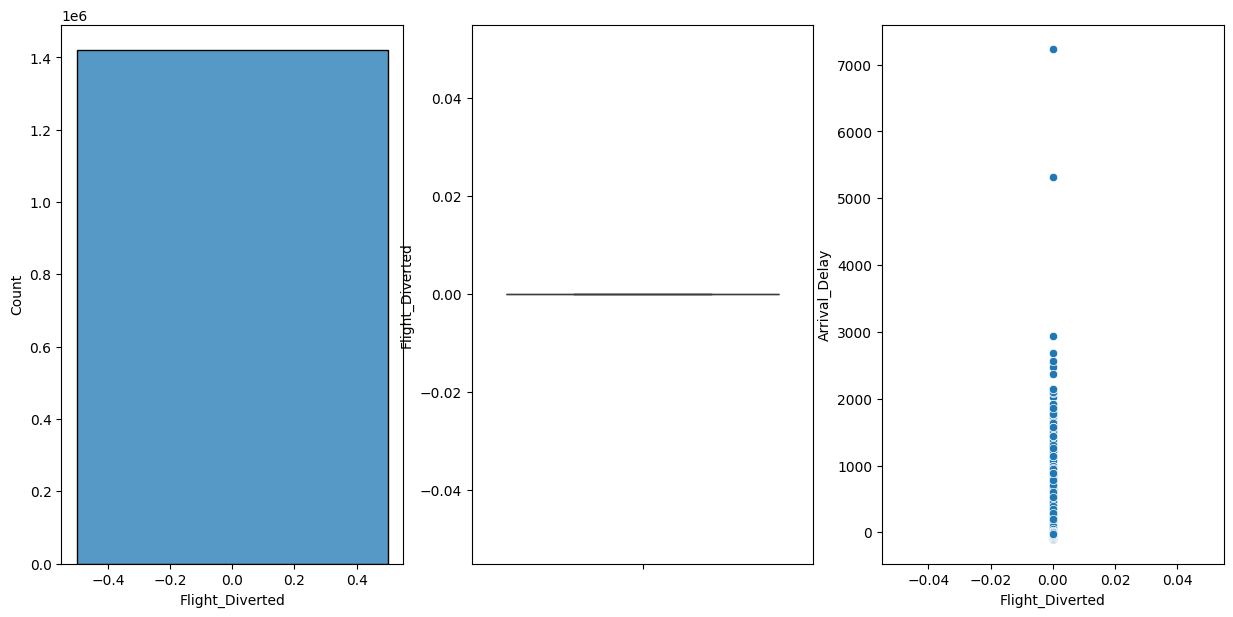

In [39]:
summarize_variable(df["Flight_Diverted"], df)

Because in our data no diverted flights are present we will drop this column

In [40]:
df.drop(["Flight_Diverted"], axis=1, inplace=True)
df_oos.drop(["Flight_Diverted"], axis=1, inplace=True)

### Taxi_Out_Time



0 missing values
178 unique values


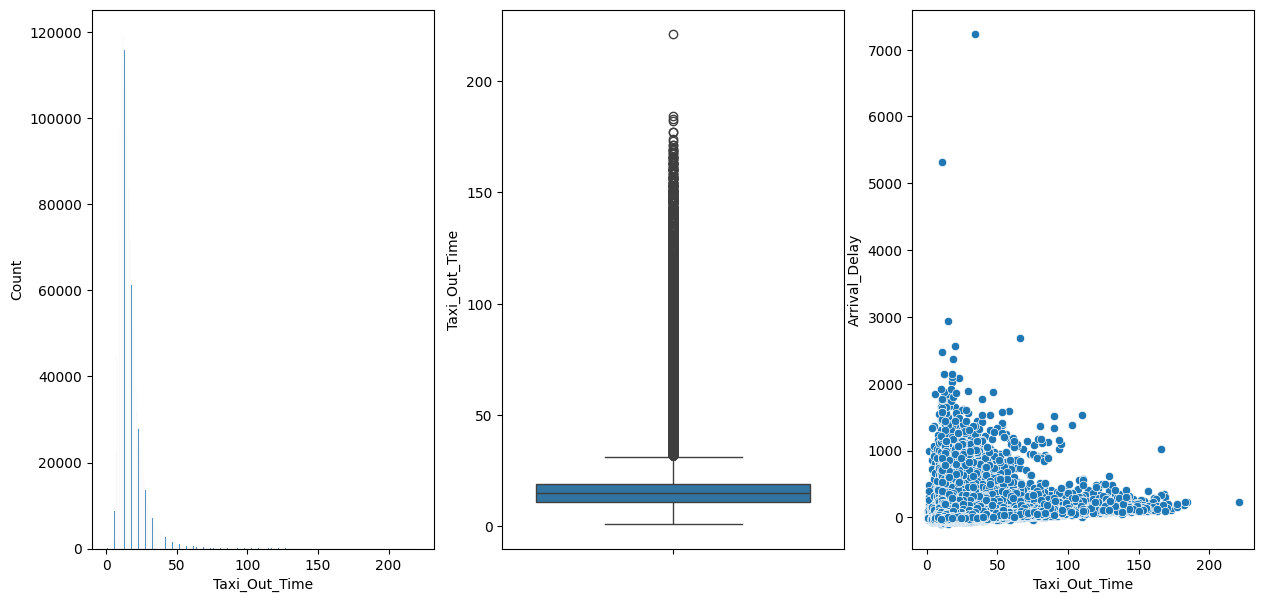

In [41]:
summarize_variable(df["Taxi_Out_Time"], df)

### Taxi_In_Time



0 missing values
173 unique values


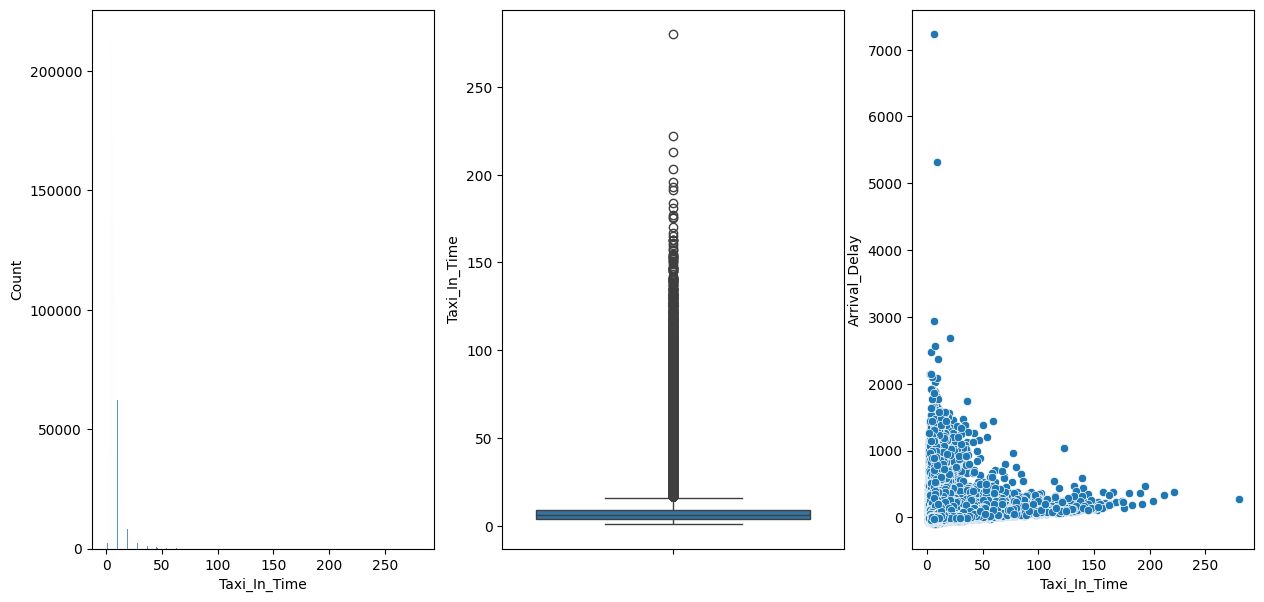

In [42]:
summarize_variable(df["Taxi_In_Time"], df)

### Actual_Departure_Time



0 missing values
1438 unique values


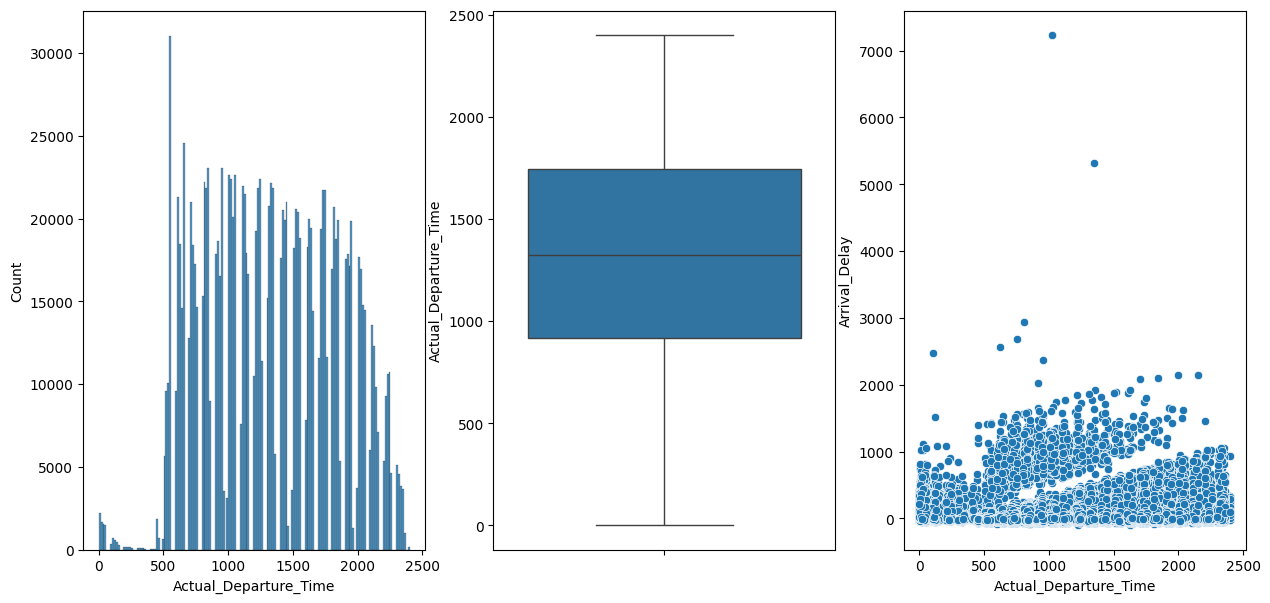

In [43]:
summarize_variable(df["Actual_Departure_Time"], df)

In [44]:
df["Actual_Departure_Time"] = cut_int_hours(df["Actual_Departure_Time"])
df_oos["Actual_Departure_Time"] = cut_int_hours(df_oos["Actual_Departure_Time"])

In [45]:
schedule_encoder = OneHotEncoder(drop="first")
schedule_encoder.fit(df["Actual_Departure_Time"].to_numpy().reshape(-1,1))

OneHotEncoder(drop='first')

In [46]:
df = pd.concat([df, transform_to_df(df["Actual_Departure_Time"], schedule_encoder, "actual_departure")], axis=1).drop("Actual_Departure_Time", axis=1)
df_oos = pd.concat([df_oos, transform_to_df(df_oos["Actual_Departure_Time"], schedule_encoder, "actual_departure")], axis=1).drop("Actual_Departure_Time", axis=1)

### Flight_Duration



0 missing values
903 unique values


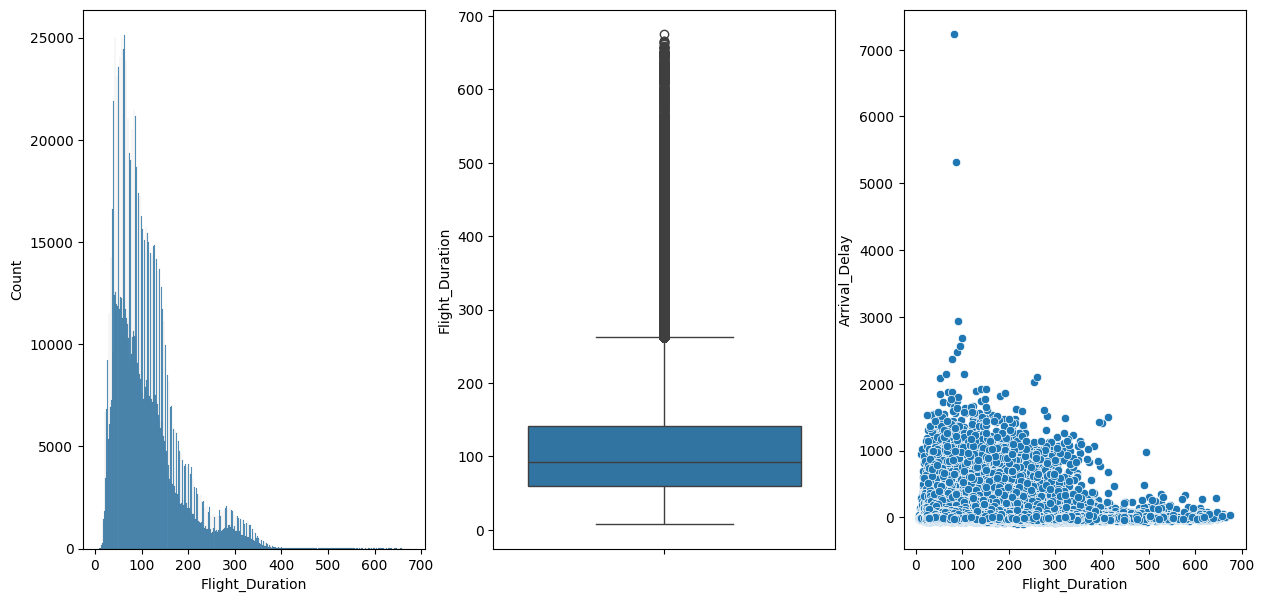

In [47]:
summarize_variable(df["Flight_Duration"], df)

### Flight_Distance



0 missing values
2417 unique values


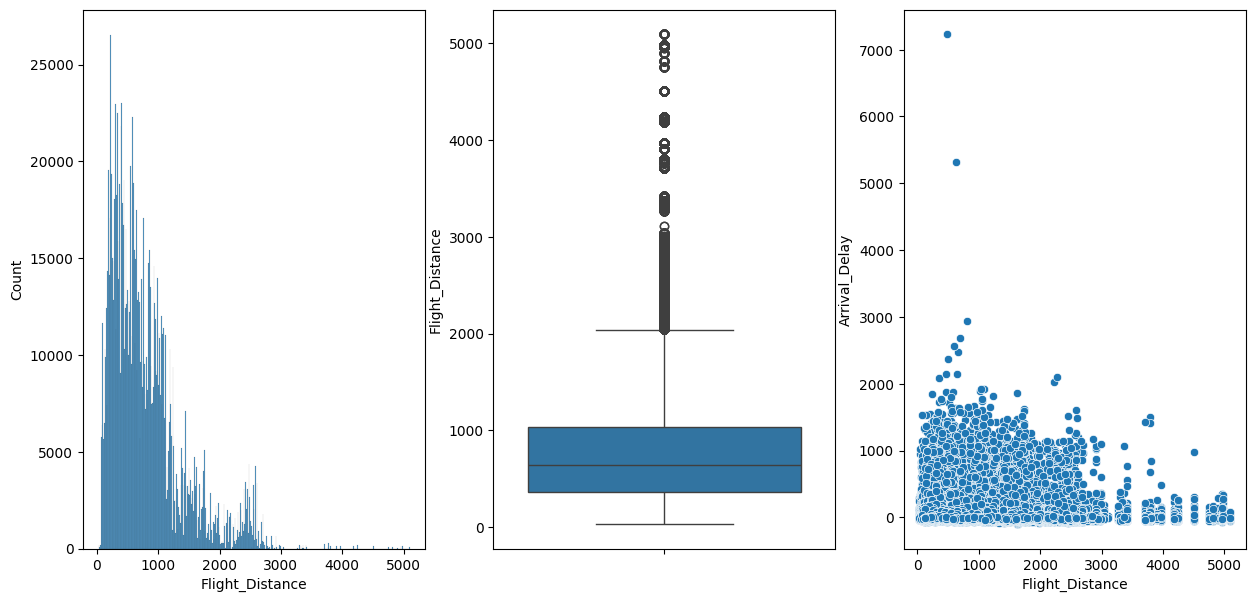

In [48]:
summarize_variable(df["Flight_Distance"], df)

### Origin_Temperature



0 missing values
1277783 unique values


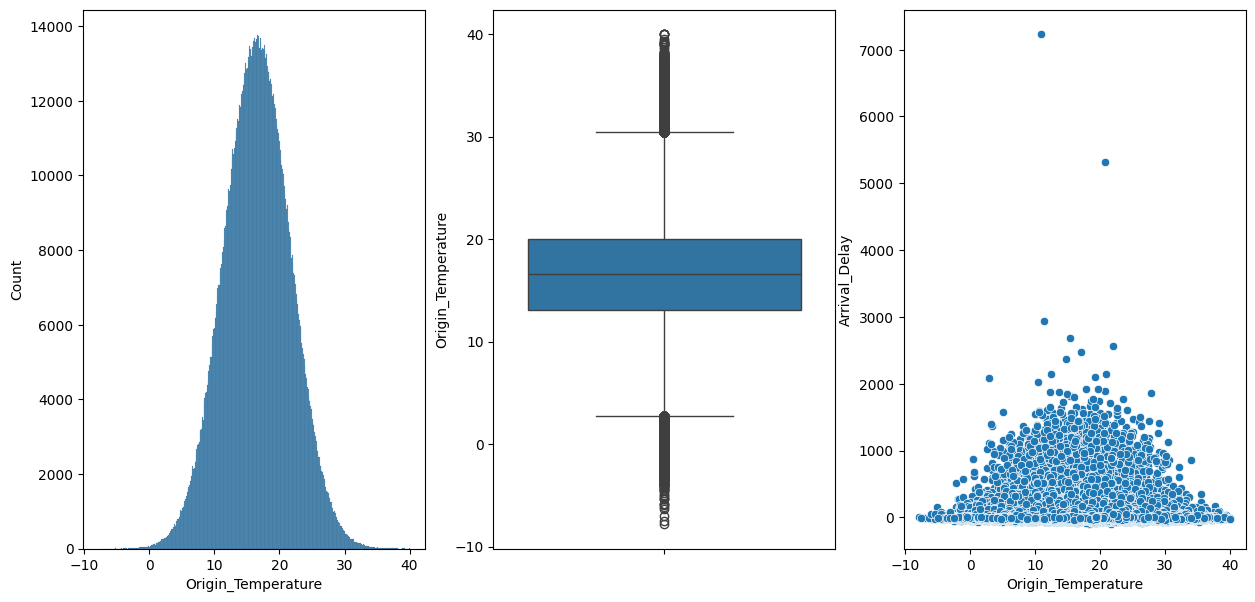

In [49]:
summarize_variable(df["Origin_Temperature"], df)

### Destination_Temperature



0 missing values
1277780 unique values


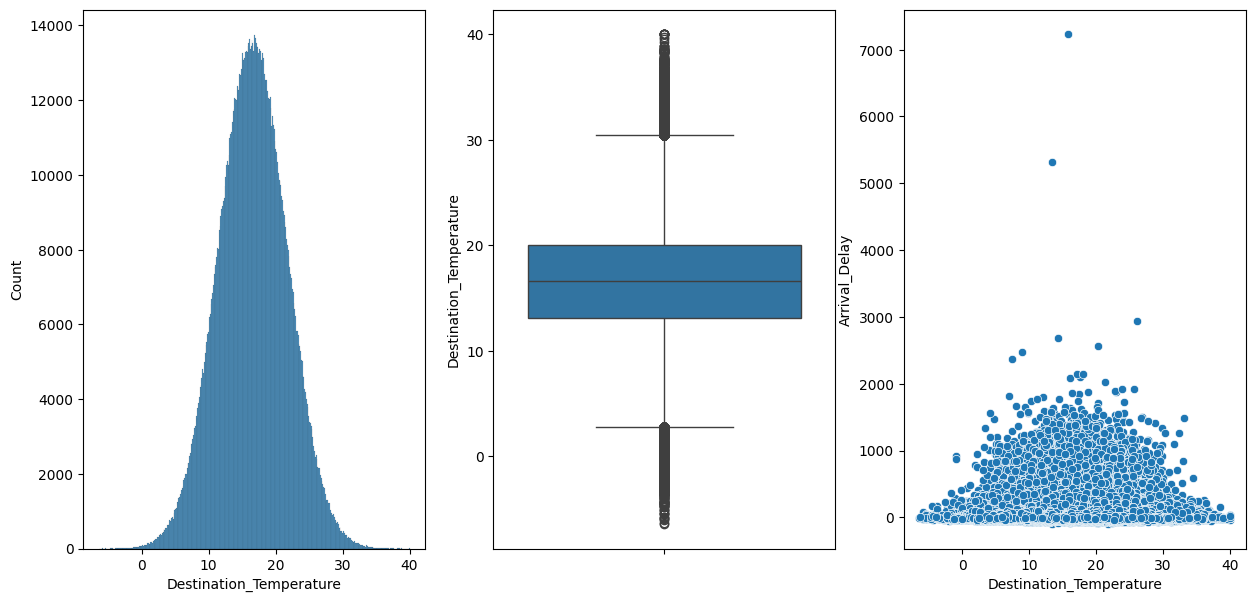

In [50]:
summarize_variable(df["Destination_Temperature"], df)

### Origin_Wind_Speed



0 missing values
1277745 unique values


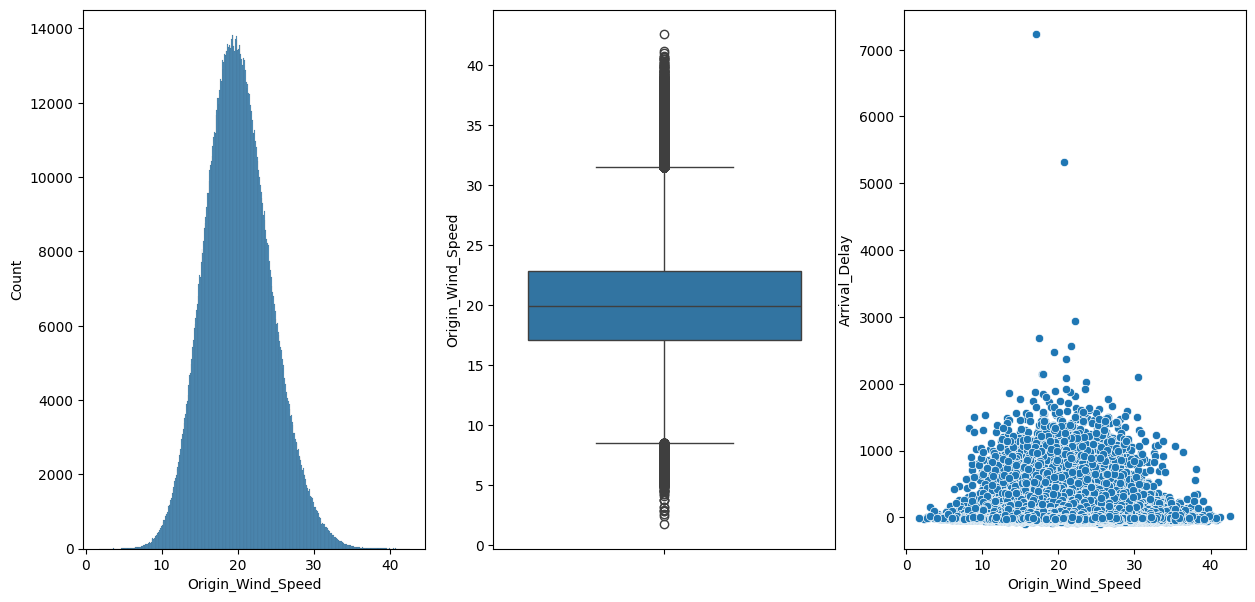

In [51]:
summarize_variable(df["Origin_Wind_Speed"], df)

### Destination_Wind_Speed



0 missing values
1277745 unique values


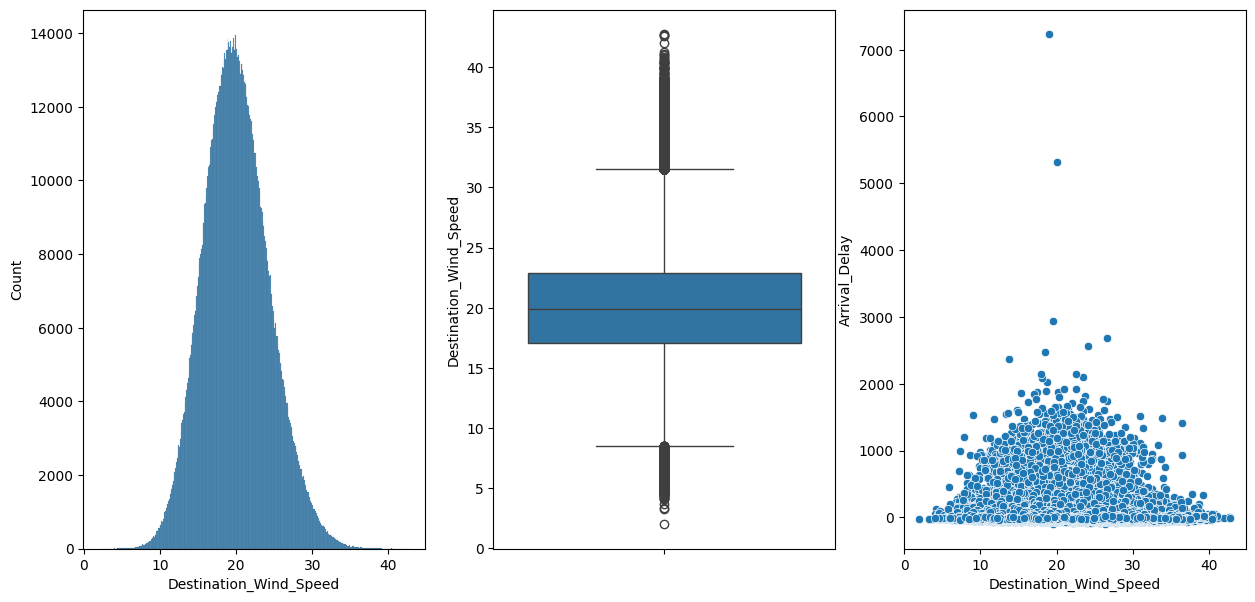

In [52]:
summarize_variable(df["Destination_Wind_Speed"], df)

### Origin_Precipitation



0 missing values
5 unique values

[0.0, 0.5, 1.0, 0.1, 2.0]


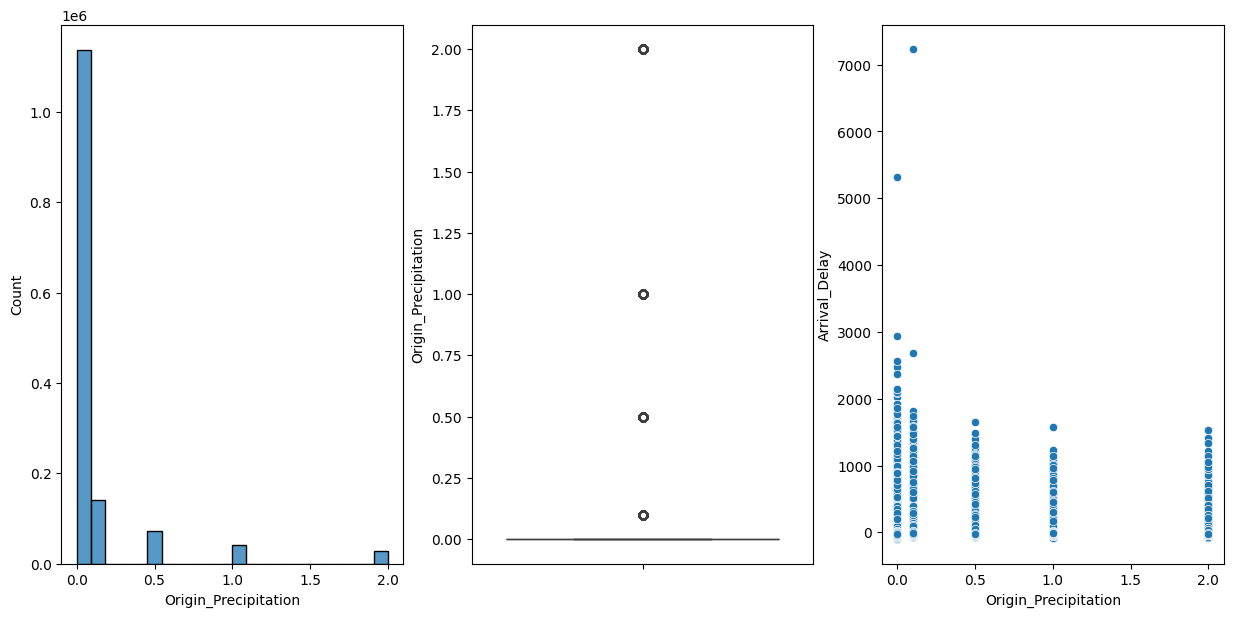

In [53]:
summarize_variable(df["Origin_Precipitation"], df)

### Destination_Precipitation



0 missing values
5 unique values

[0.0, 0.1, 2.0, 1.0, 0.5]


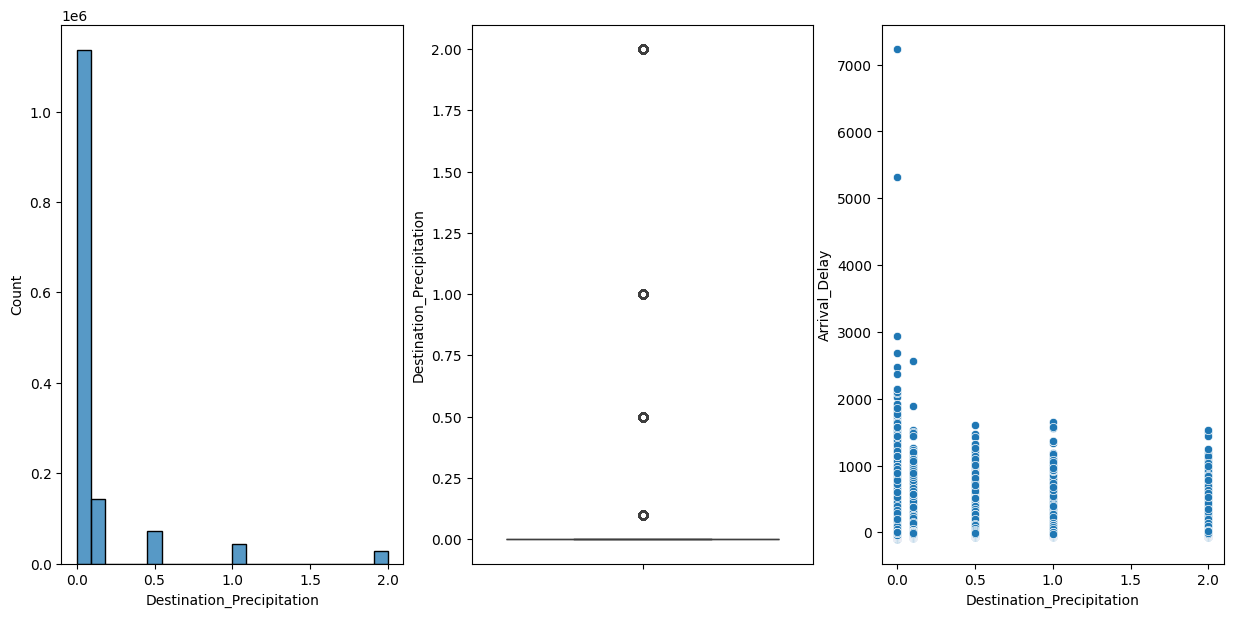

In [54]:
summarize_variable(df["Destination_Precipitation"], df)

## Final data preparations

Because different continous columns are on different scales and we saw some outliers in our data, we will scale those columns using RobustScaler

In [55]:
cols_to_scale = ['Departure_Delay', 'Taxi_Out_Time', 'Taxi_In_Time', 'Flight_Duration', 'Flight_Distance', 'Origin_Temperature', 'Destination_Temperature', 'Origin_Wind_Speed', 'Destination_Wind_Speed', 'Origin_Precipitation', 'Destination_Precipitation']

In [56]:
for col in cols_to_scale:
    scaler = RobustScaler()
    df[col] = scaler.fit_transform(df[col].to_numpy().reshape(-1,1))
    df_oos[col] = scaler.transform(df_oos[col].to_numpy().reshape(-1,1))

## Saving the data

In [57]:
df.to_csv("../data/data_prepared.csv", index=False)
df_oos.to_csv("../data/oos.csv")